In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

In [2]:
df=pd.read_excel(r"C:\Users\ankit\Python Project\Helth insurance project\premiums_young.xlsx")

In [3]:
df.head(2)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050


In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [5]:
df.shape

(17563, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17563 entries, 0 to 17562
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    17563 non-null  int64 
 1   Gender                 17563 non-null  object
 2   Region                 17563 non-null  object
 3   Marital_status         17563 non-null  object
 4   Number Of Dependants   17563 non-null  int64 
 5   BMI_Category           17563 non-null  object
 6   Smoking_Status         17561 non-null  object
 7   Employment_Status      17562 non-null  object
 8   Income_Level           17559 non-null  object
 9   Income_Lakhs           17563 non-null  int64 
 10  Medical History        17563 non-null  object
 11  Insurance_Plan         17563 non-null  object
 12  Annual_Premium_Amount  17563 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.7+ MB


In [7]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,17563.000000,17563.000000,17563.000000,17563.000000
mean,20.988385,0.715823,22.648579,8161.698856
std,1.998286,0.938451,23.775222,2763.912827
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6035.000000
50%,21.000000,0.000000,16.000000,7951.000000
75%,23.000000,1.000000,31.000000,9574.000000
max,24.000000,3.000000,790.000000,18186.000000


In [8]:
df.columns=df.columns.str.replace(" ","_").str.lower()

In [9]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [10]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

## Handling nulls and duplicates

In [11]:
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,17557.000000,17557.000000,17557.000000,17557.000000
mean,20.988609,0.715840,22.653585,8161.883237
std,1.998258,0.938388,23.777397,2764.254265
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6035.000000
50%,21.000000,0.000000,16.000000,7951.000000
75%,23.000000,1.000000,31.000000,9575.000000
max,24.000000,3.000000,790.000000,18186.000000


In [15]:
df[df.number_of_dependants<0]["number_of_dependants"].value_counts()

number_of_dependants
-3    11
-1     6
Name: count, dtype: int64

In [16]:
df.number_of_dependants=np.abs(df.number_of_dependants)

In [17]:
df.number_of_dependants.describe()

count    17557.000000
mean         0.720283
std          0.934982
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

# Outlier Treatment

In [18]:
def bplot(data):

    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR

    
    sns.boxplot(data)
    plt.axhline(lower, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(upper, color='blue', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.show()

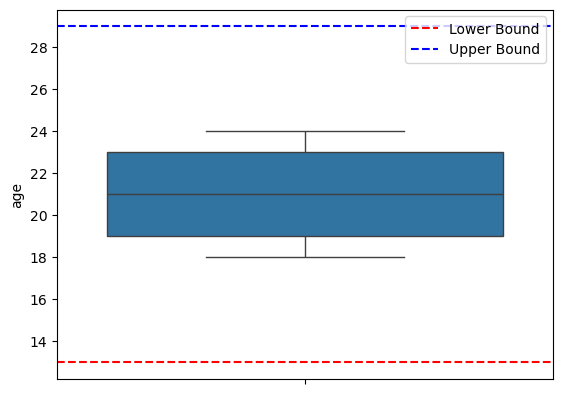

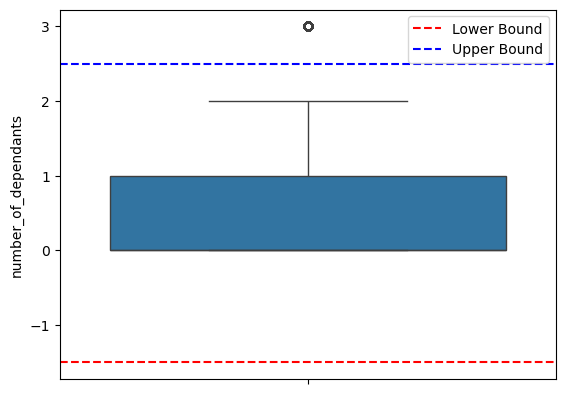

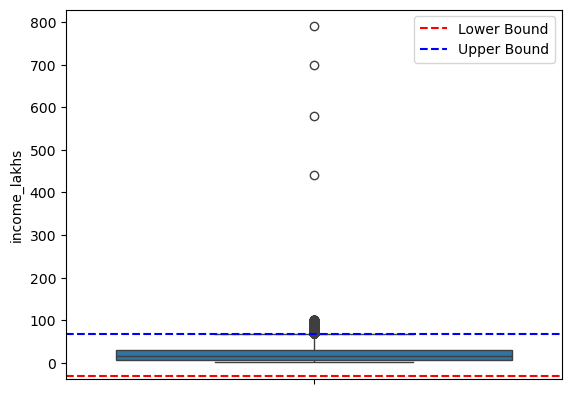

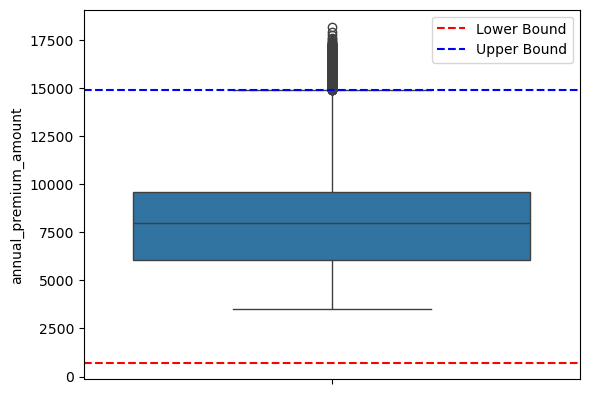

In [19]:
for c in df.select_dtypes([float,int]).columns:
    bplot(df[c])

In [20]:
df1=df[df.age<=100].copy()

# univariate analysis

<Axes: xlabel='income_lakhs', ylabel='Count'>

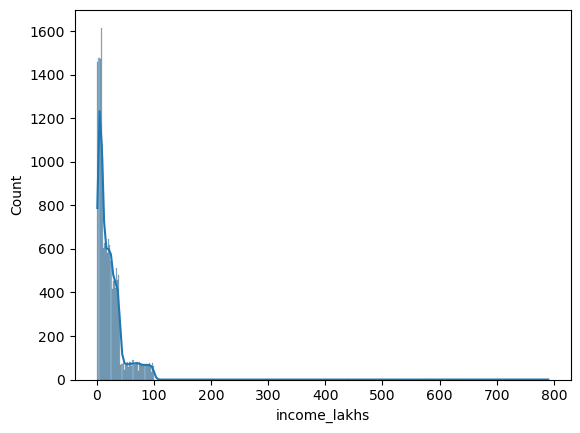

In [21]:
sns.histplot(df1.income_lakhs,kde=True)

In [22]:
def iqr_bounds(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    return upper,lower

In [23]:
df2=df1[df1.income_lakhs<=df1.income_lakhs.quantile(0.999)].copy()

In [24]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,17553.000000,17553.000000,17553.000000,17553.000000
mean,20.988606,0.720447,22.515752,8161.547884
std,1.998457,0.935025,21.867015,2764.266929
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6035.000000
50%,21.000000,0.000000,16.000000,7951.000000
75%,23.000000,1.000000,31.000000,9574.000000
max,24.000000,3.000000,100.000000,18186.000000


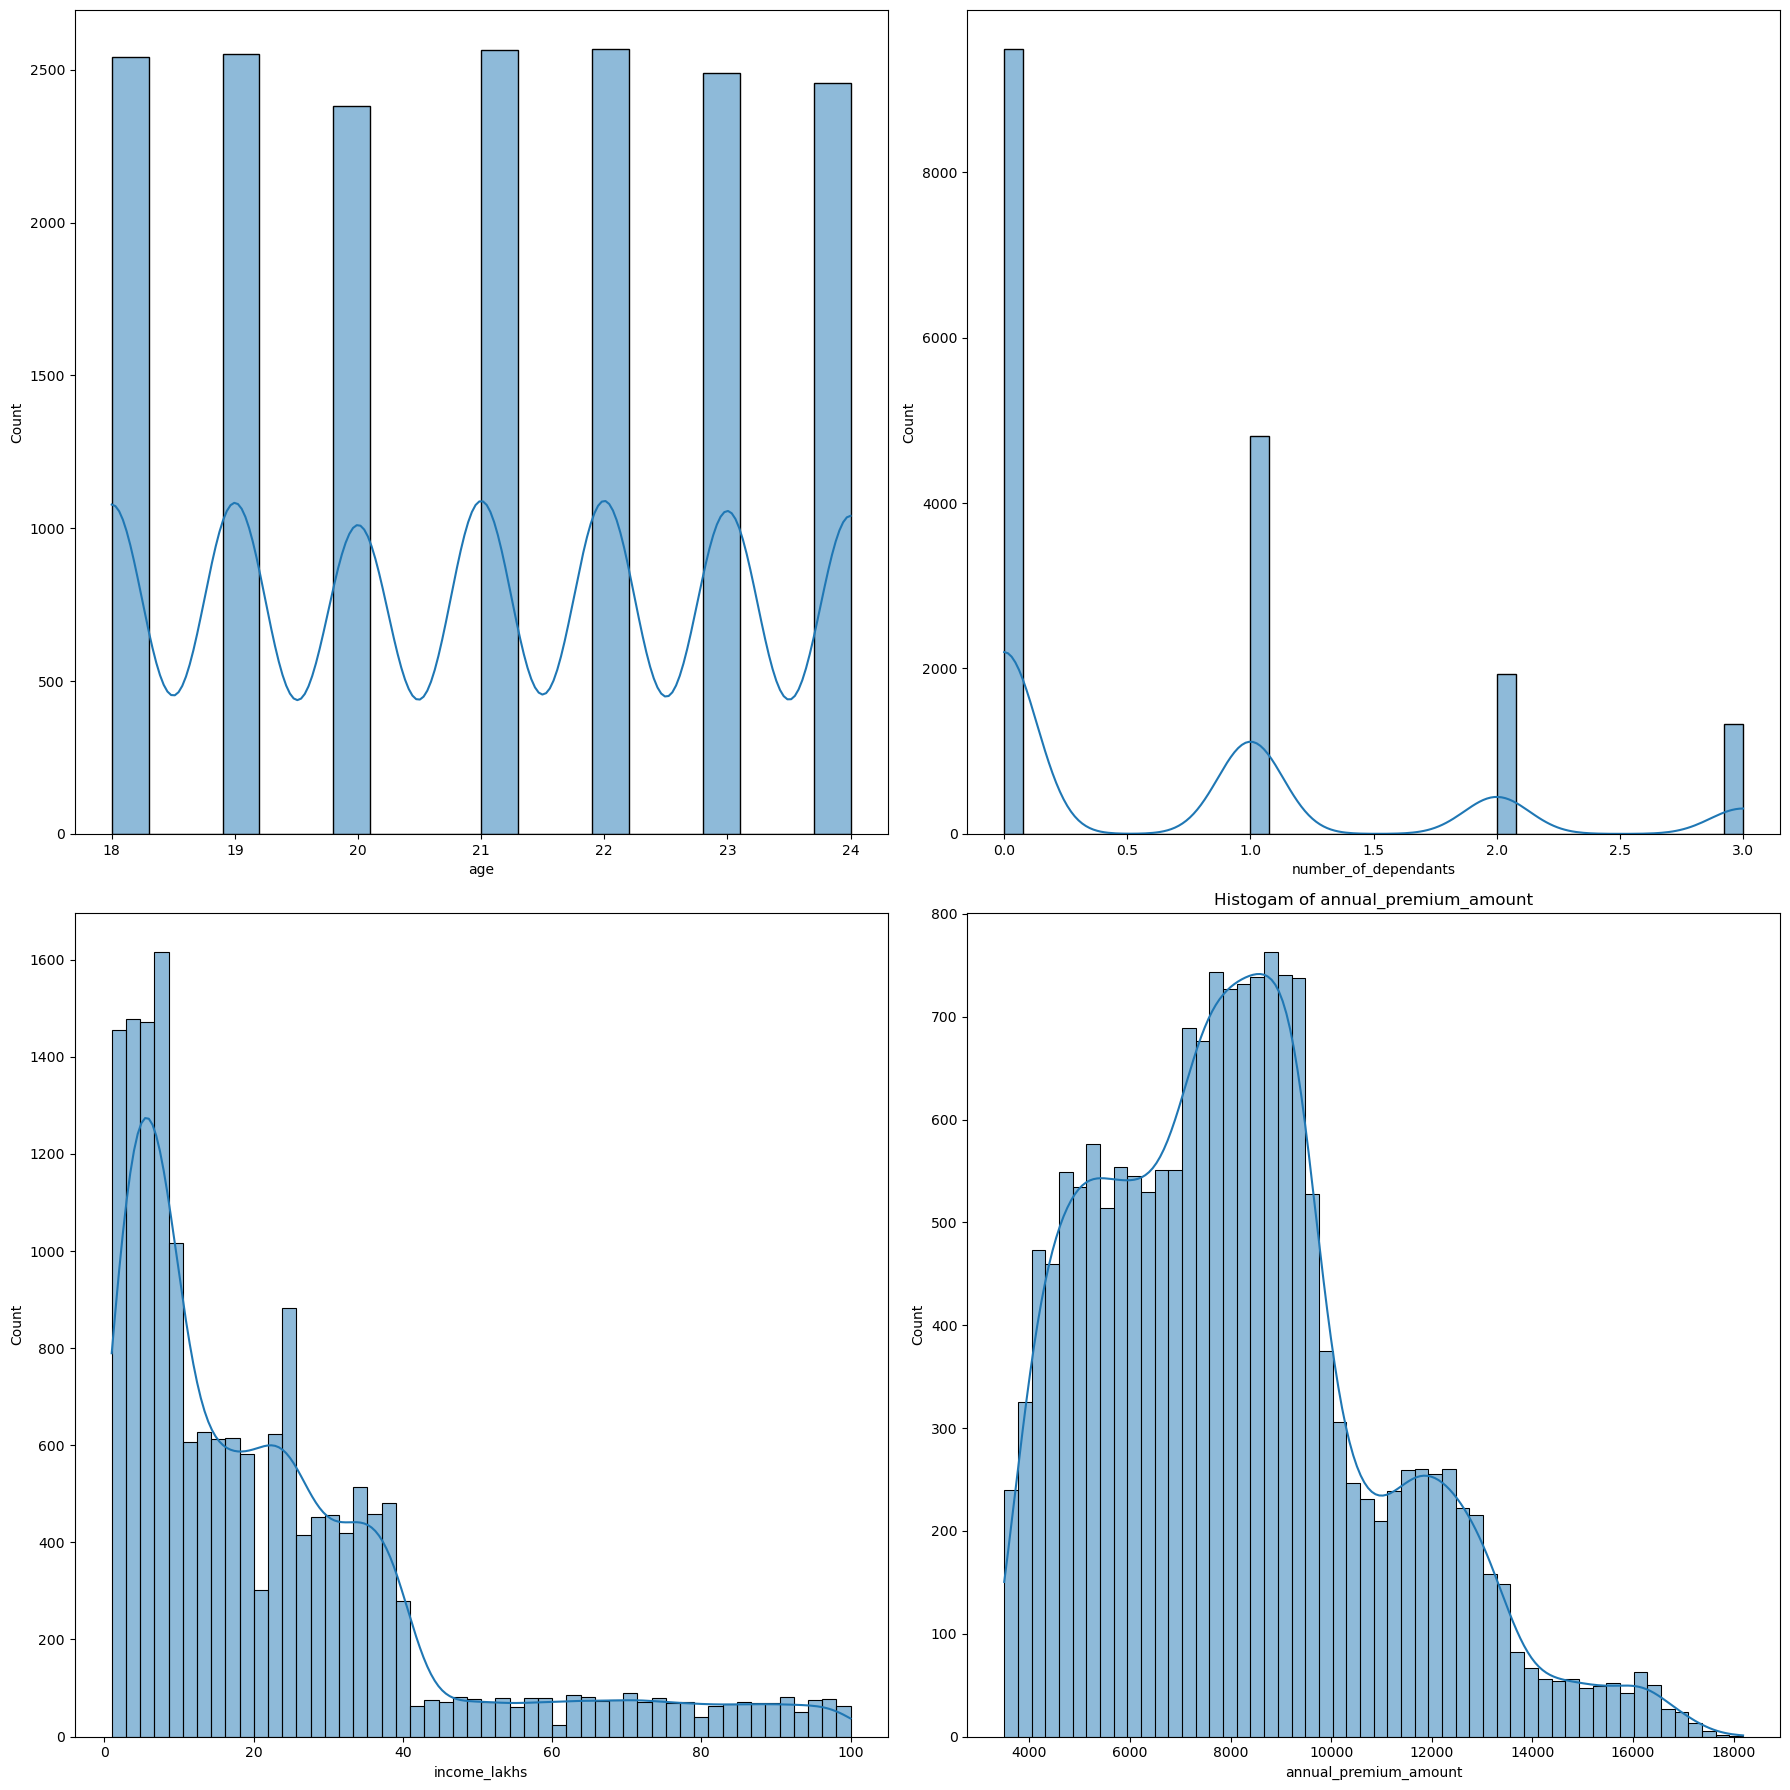

In [25]:
fig,axes=plt.subplots(2,2,figsize=(18,18))
axes=axes.flatten()



for ax,col in zip(axes,df2.select_dtypes([float,int]).columns):
    
    
    plt.title(f"Histogam of {col}")
    sns.histplot(df2[col],kde=True,ax=ax)
    
plt.tight_layout()    
plt.show()
    

# Bivariate analysis

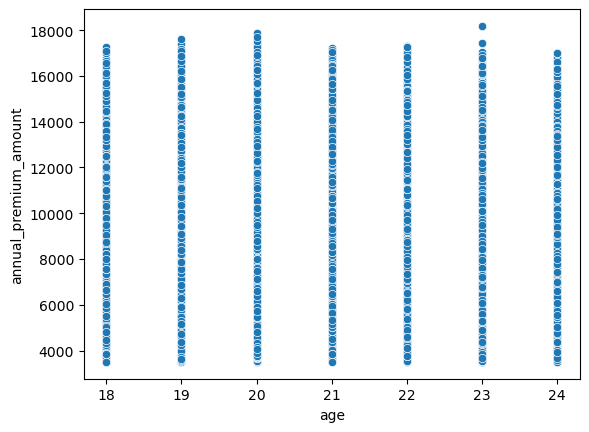

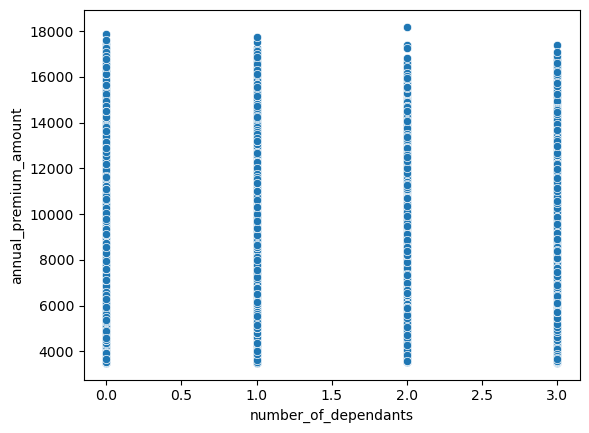

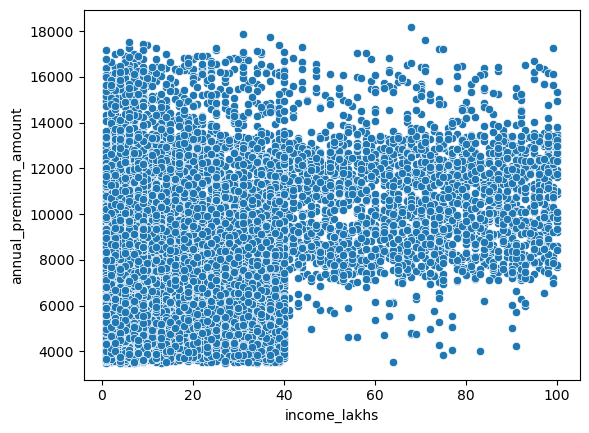

In [26]:
for col in df2.select_dtypes([float,int]).columns:
    if col=="annual_premium_amount":
        continue
    sns.scatterplot(x=df2[col],y=df2.annual_premium_amount)
    plt.show()

In [27]:
for col in df2.select_dtypes('object').columns:
    print(f"{col}:",df2[col].unique())
    

gender: ['Male' 'Female']
region: ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status: ['Regular' 'No Smoking' 'Occasional' 'Not Smoking' 'Does Not Smoke'
 'Smoking=0']
employment_status: ['Self-Employed' 'Freelancer' 'Salaried']
income_level: ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history: ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan: ['Silver' 'Bronze' 'Gold']


In [28]:
df2["smoking_status"]=df2["smoking_status"].replace({'Smoking=0':'No Smoking',
                                   'Does Not Smoke':'No Smoking',
                                   'Not Smoking':'No Smoking'}
                                   )
    

In [29]:
pct_count=df2["gender"].value_counts(normalize=True)

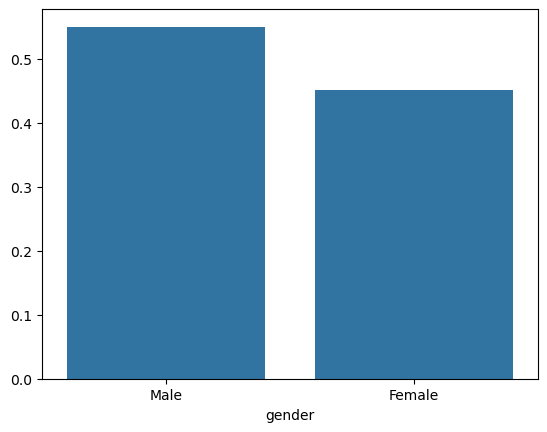

In [30]:
sns.barplot(x=pct_count.index,y=pct_count.values)
plt.show()

In [31]:
len(df2.select_dtypes('object').columns)

9

In [32]:
categorical_column=df2.select_dtypes(object).columns
categorical_column

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

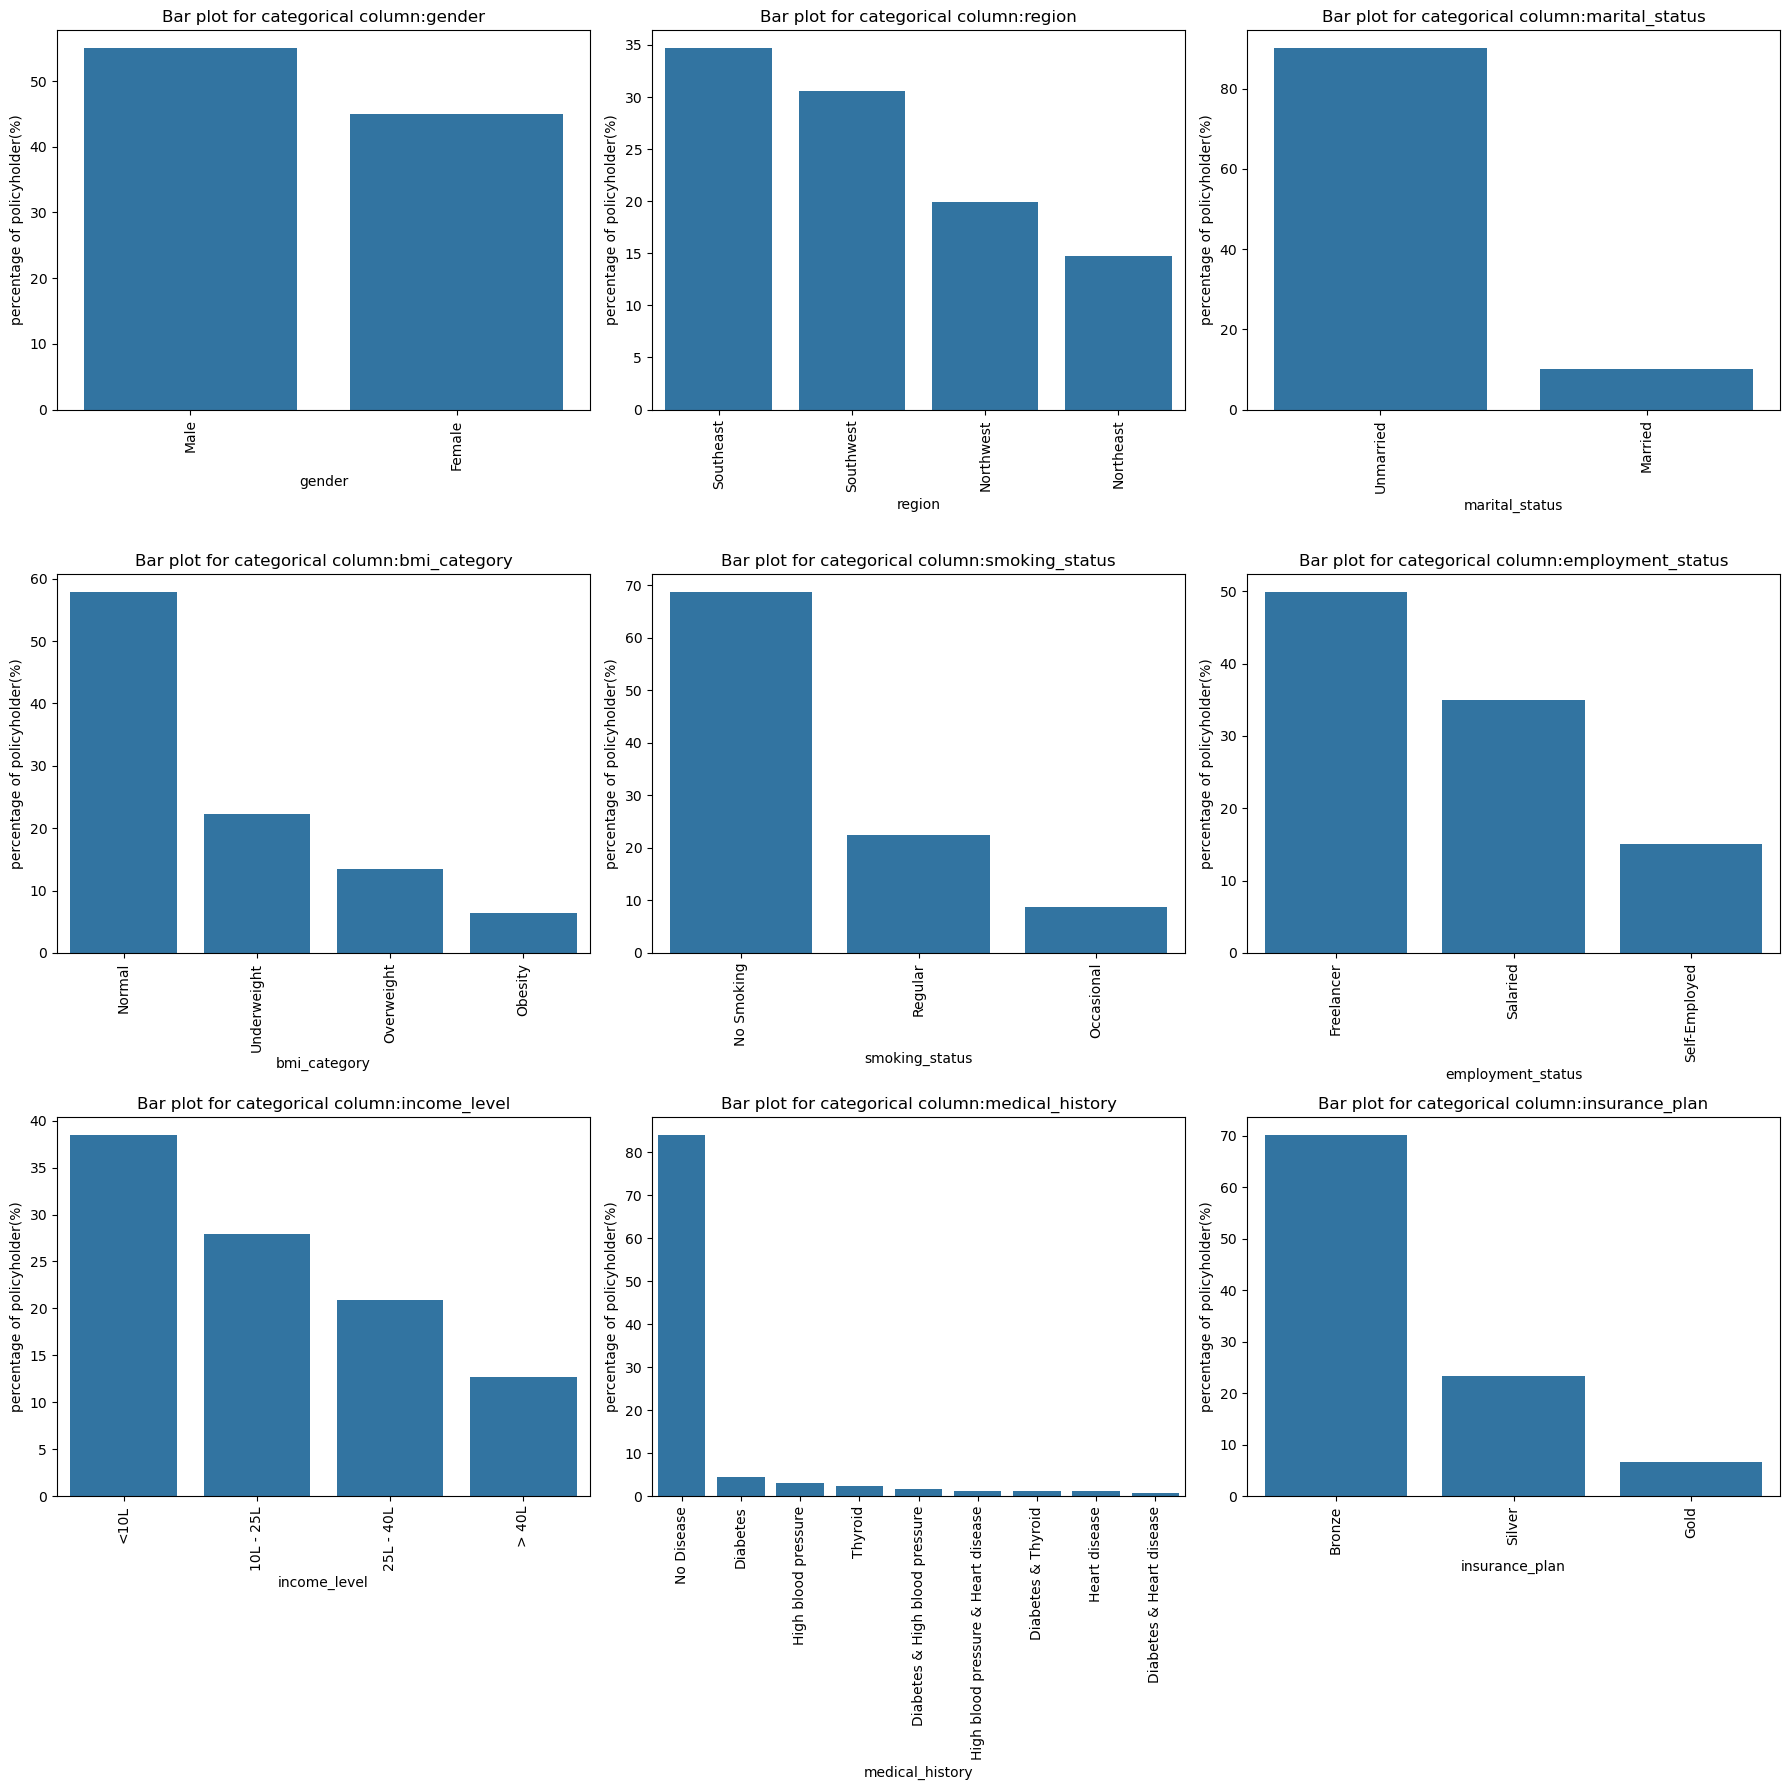

In [33]:
fig,axes=plt.subplots(3,3,figsize=(18,18))
axes=axes.flatten()

for ax,column in zip(axes,categorical_column):
    category_count=df2[column].value_counts(normalize=True)*100
    
    sns.barplot(x=category_count.index,y=category_count.values,ax=ax)
    ax.set_title(f"Bar plot for categorical column:{column}")
    ax.set_ylabel("percentage of policyholder(%)")
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=90)
    

plt.tight_layout()
plt.show()

In [34]:
crosstab=pd.crosstab(df2["income_level"],df2["insurance_plan"])

In [35]:
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,3905,288,718
25L - 40L,2937,183,544
<10L,5366,370,1016
> 40L,99,321,1806


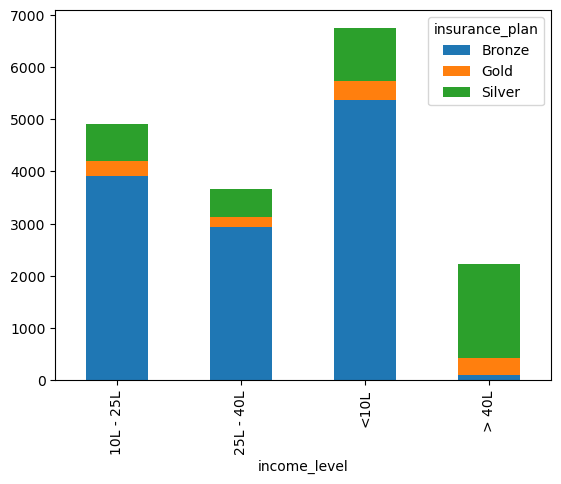

In [36]:
crosstab.plot(kind='bar',stacked=True)
plt.show()

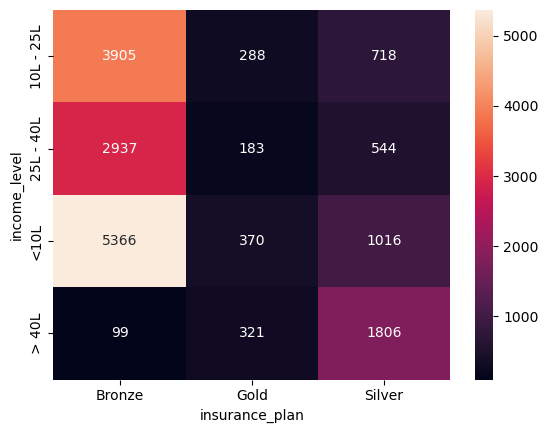

In [37]:
sns.heatmap(crosstab,annot=True,fmt='d')
plt.show()

In [38]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050


In [39]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

# Feature Engineering

In [40]:
risk_score={
    'diabetes':6,
    'high blood pressure':6,
    'no disease':0,
    'thyroid':5,
    'heart disease':8,
    'none':0
}
df2[["disease1","disease2"]]=df2.medical_history.str.split("&",expand=True).apply(lambda x:x.str.lower().str.strip().fillna('none'))

In [41]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
11603,18,Female,Southwest,Married,3,Normal,No Smoking,Freelancer,> 40L,60,Diabetes & High blood pressure,Silver,8463,diabetes,high blood pressure
14819,24,Female,Southeast,Unmarried,0,Obesity,No Smoking,Freelancer,10L - 25L,22,No Disease,Bronze,7320,no disease,none
1369,23,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,6,No Disease,Bronze,4034,no disease,none
5814,23,Female,Southeast,Unmarried,1,Obesity,No Smoking,Freelancer,25L - 40L,36,No Disease,Bronze,5909,no disease,none
172,20,Male,Southeast,Married,3,Overweight,Regular,Freelancer,> 40L,46,No Disease,Silver,11378,no disease,none


In [42]:
df2["total_risk_score"]=df2['disease1'].map(risk_score)+df2['disease2'].map(risk_score)
df2['normalised_risk_score']=(df2["total_risk_score"]-df2['total_risk_score'].min())/(df2["total_risk_score"].max()-df2["total_risk_score"].min())

In [43]:
df2.sample(5)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
14376,18,Male,Northeast,Unmarried,0,Underweight,Regular,Salaried,> 40L,89,No Disease,Silver,12472,no disease,none,0,0.000000
11206,18,Female,Southwest,Unmarried,2,Normal,No Smoking,Freelancer,<10L,4,No Disease,Bronze,6884,no disease,none,0,0.000000
717,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,> 40L,46,No Disease,Gold,12241,no disease,none,0,0.000000
1748,19,Female,Northwest,Unmarried,1,Underweight,No Smoking,Freelancer,10L - 25L,24,No Disease,Bronze,6831,no disease,none,0,0.000000
3840,22,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,<10L,9,Diabetes,Gold,11774,diabetes,none,6,0.428571


In [44]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [45]:
df2.insurance_plan=df.insurance_plan.map({'Bronze':1,'Silver':2,'Gold':3})

In [46]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
2411,21,Female,Southwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,31,No Disease,1,9206,no disease,none,0,0.000000
8672,20,Female,Southwest,Unmarried,1,Underweight,No Smoking,Salaried,25L - 40L,35,No Disease,1,6456,no disease,none,0,0.000000
8385,19,Female,Northeast,Unmarried,1,Normal,No Smoking,Self-Employed,<10L,4,No Disease,2,7341,no disease,none,0,0.000000
6506,24,Female,Southwest,Unmarried,0,Normal,Occasional,Freelancer,> 40L,98,Diabetes,2,9840,diabetes,none,6,0.428571
12650,19,Male,Southwest,Unmarried,1,Normal,Regular,Self-Employed,25L - 40L,34,No Disease,1,6165,no disease,none,0,0.000000


In [47]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [48]:
df2.income_level=df2.income_level.map({'<10L':1, '10L - 25L':2, '> 40L':3, '25L - 40L':4})

In [49]:
nominal_col=['gender', 'region', 'marital_status','bmi_category', 'smoking_status','employment_status']

In [50]:
df3=pd.get_dummies(df2,columns=nominal_col,drop_first=True,dtype=int)

In [51]:
df3.sample(2)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
2422,21,1,1,3,No Disease,1,8398,no disease,none,0,...,1,0,1,0,0,0,0,0,0,0
16744,23,0,1,2,No Disease,2,7309,no disease,none,0,...,0,0,1,0,0,1,0,0,1,0


In [52]:
df4=df3.drop(["medical_history","disease1","disease2","total_risk_score"],axis=1)

In [53]:
df4.sample(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14362,19,0,1,6,1,7360,0.0,0,1,0,0,1,0,1,0,0,0,0,0


<Axes: >

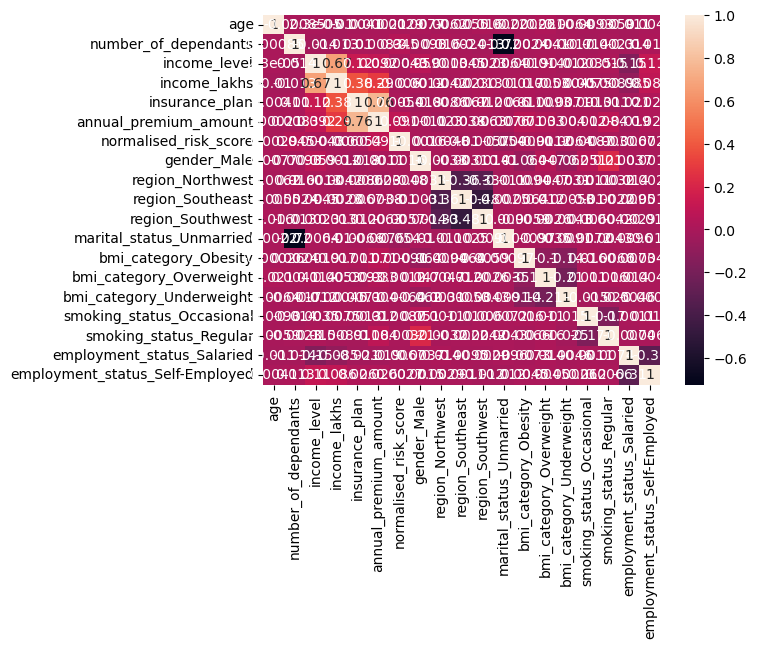

In [54]:
sns.heatmap(df4.corr(),annot=True)

In [55]:
X=df4.drop('annual_premium_amount',axis=1)
y=df4['annual_premium_amount']

In [56]:
X.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,2,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [57]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
X[cols_to_scale]=scalar.fit_transform(X[cols_to_scale])

In [58]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.666667,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.666667,0.000000,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.500000,0.000000,0.666667,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,0.333333,0.666667,0.333333,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
4,0.666667,0.000000,1.000000,0.292929,1.0,0.428571,0,0,0,1,1,0,0,1,0,1,0,0


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['column']=data.columns
    vif_df['Vif']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [60]:
calculate_vif(X)

,column,Vif
0,age,3.070269
1,number_of_dependants,1.861383
2,income_level,3.908875
3,income_lakhs,4.330704
4,insurance_plan,1.655715
5,normalised_risk_score,1.154522
6,gender_Male,2.319543
7,region_Northwest,2.130336
8,region_Southeast,2.958348
9,region_Southwest,2.734079


###### we will drop columns only if the vif is greater than 10 and columns are to be dropped one by one and then checked for vif however we are dropping vif to match lecture requirement
| VIF Value  | Interpretation                                | Action Needed?               |
| ---------- | --------------------------------------------- | ---------------------------- |
| **1**      | No multicollinearity                          | ✅ Ideal                      |
| **1 - 5**  | Moderate correlation                          | ✅ Usually okay               |
| **5 - 10** | High correlation (possible multicollinearity) | ⚠️ Investigate further       |
| **> 10**   | Severe multicollinearity                      | ❌ Remove or combine features |


In [61]:
calculate_vif(X.drop("income_level",axis=1))

,column,Vif
0,age,3.067751
1,number_of_dependants,1.853494
2,income_lakhs,2.288371
3,insurance_plan,1.595696
4,normalised_risk_score,1.154253
5,gender_Male,2.301888
6,region_Northwest,2.128194
7,region_Southeast,2.954288
8,region_Southwest,2.731714
9,marital_status_Unmarried,7.260352


In [62]:
X_reduced=X.drop('income_level',axis=1)

# Model Training

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=10)

In [64]:
print(f"X_train:{X_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")

X_train:(12287, 17)
X_test:(5266, 17)
y_train:(12287,)
y_test:(5266,)


In [65]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
y_pred=model_lr.predict(X_test)


train_score=model_lr.score(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score,test_score

(0.6061342031678358, 0.606223344609774)

In [66]:
model_lr.intercept_

6585.995084576349

In [67]:
model_lr.coef_

array([ 3.30766453e+01, -4.42423008e+01,  2.88589782e+01,  7.01168021e+03,
        1.03835322e+03, -4.15723651e+01, -9.64331858e+01,  1.21622805e+00,
       -4.29766783e+01, -6.48576520e+01,  7.92512208e+02,  4.08728893e+02,
        1.50620658e+02,  2.95492856e+02,  6.47153710e+02, -3.51270089e+01,
        6.19227987e+00])

In [68]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalised_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

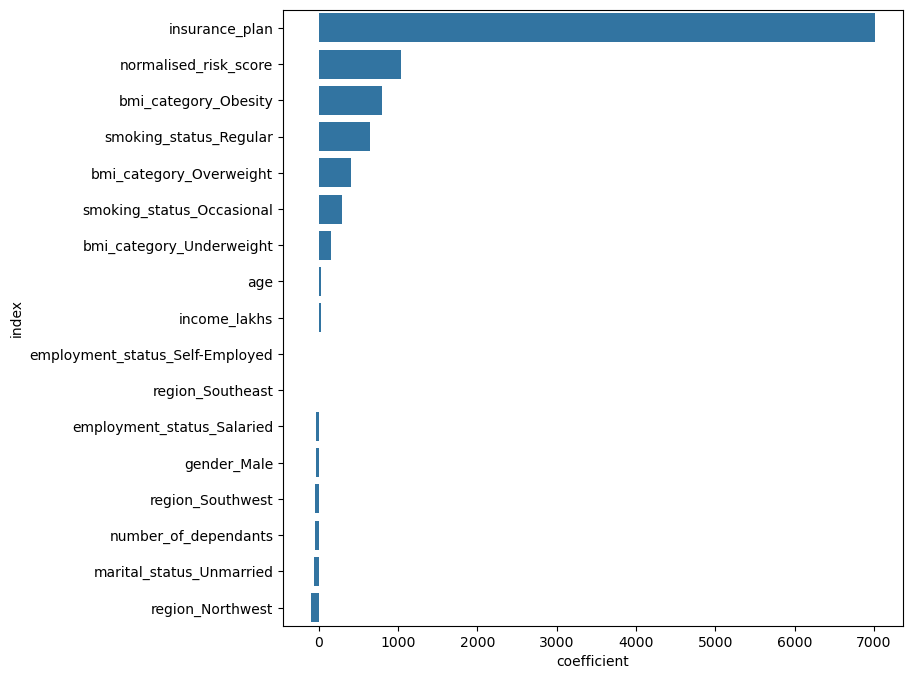

In [69]:
coef_df=pd.DataFrame(model_lr.coef_,X_test.columns,columns=["coefficient"]).reset_index()

coef_df=coef_df.sort_values(by='coefficient',ascending=False)
coef_df


plt.figure(figsize=(8,8))
sns.barplot(x=coef_df["coefficient"],y=coef_df["index"])
plt.show()

In [70]:
model_ridge=Ridge()

In [71]:
model_ridge=Ridge()
model_ridge.fit(X_train,y_train)
train_score=model_ridge.score(X_train,y_train)
test_score=model_ridge.score(X_test,y_test)
train_score,test_score

(0.606133624845288, 0.6062329764369687)

In [72]:
from xgboost import XGBRegressor

In [73]:
from xgboost import XGBRegressor
model_xg=XGBRegressor()
model_xg.fit(X_train,y_train)
y_pred=model_xg.predict(X_test)
train_score=model_xg.score(X_train,y_train)
test_score=model_xg.score(X_test,y_test)
train_score,test_score

(0.7392029762268066, 0.5596404075622559)

In [74]:
rsme=root_mean_squared_error(y_test,y_pred)

In [75]:
rsme

1834.6047798613258

In [76]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
print(np.sqrt(mse))

3365774.698290024
1834.6047798613258


In [77]:
model_xgb=XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2')
    

In [78]:
random_search.fit(X_train,y_train)
random_search.best_score_

0.6035029292106628

In [79]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

In [80]:
best_model=model_lr

In [81]:
best_model

LinearRegression()

# Error Analysis

In [82]:
res=pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred,
    
})

In [83]:
res['residuals']=res['y_pred']-res['y_test']
res['residual%']=res['residuals']*100/res['y_test']
res.head()

,y_test,y_pred,residuals,residual%
5184,9525,6895.796875,-2629.203125,-27.603182
4370,11900,9320.416992,-2579.583008,-21.677168
10550,5606,5903.188965,297.188965,5.301266
15707,8438,5979.831055,-2458.168945,-29.132128
4692,7626,6990.961914,-635.038086,-8.327276


<Axes: xlabel='residual%', ylabel='Count'>

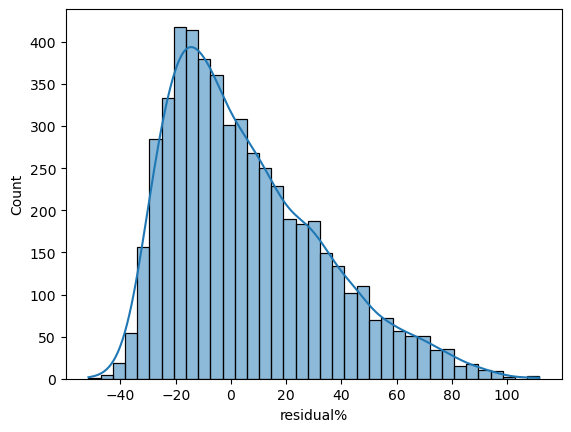

In [84]:
sns.histplot(res['residual%'],kde=True)

In [85]:
extreme_error=10
extreme_error_threshold=res[np.abs(res['residual%'])>extreme_error]

In [86]:
len(extreme_error_threshold)*100/len(res)

72.35093049753134

In [87]:
extreme_error=50
extreme_error_threshold=res[np.abs(res['residual%'])>extreme_error]

In [88]:
extreme_error_threshold.sort_values(by='residual%',ascending=False)

,y_test,y_pred,residuals,residual%
13716,3603,7627.660156,4024.660156,111.703030
1357,4474,9367.038086,4893.038086,109.366073
13100,3541,7398.110840,3857.110840,108.927163
13404,3787,7654.000488,3867.000488,102.112503
9754,3713,7369.356445,3656.356445,98.474453
...,...,...,...,...
13062,4893,7354.907715,2461.907715,50.314893
9423,4068,6110.023438,2042.023438,50.197233
2001,4068,6108.144043,2040.144043,50.151034
6736,7199,10808.452148,3609.452148,50.138243


In [89]:
extreme_error_threshold.index

Index([14039,  8650,  9042,  8558,  6718, 12014,  1369,  1791,  6564,  1331,
       ...
       13077, 10246, 16700, 16643,  6713, 16627,  3417, 14727,  5813, 13224],
      dtype='int64', length=426)

In [90]:
extreme_error_df=X_test.loc[extreme_error_threshold.index]

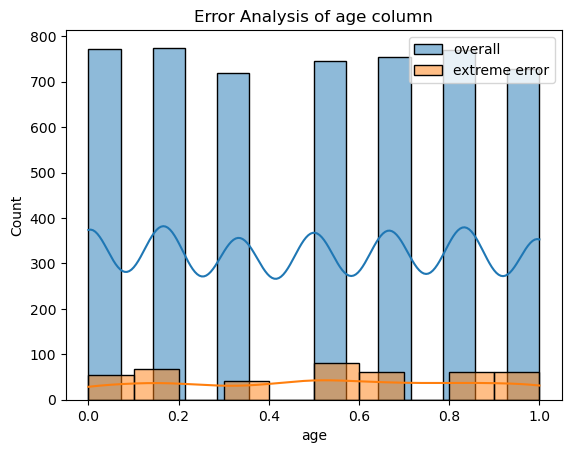

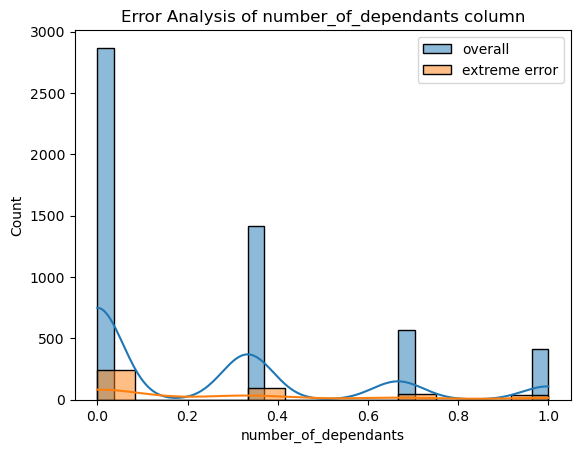

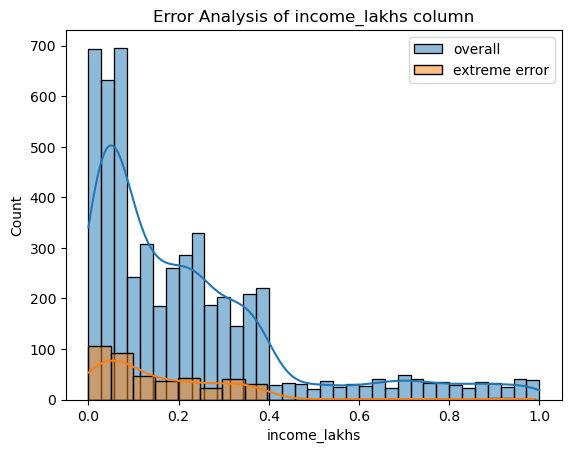

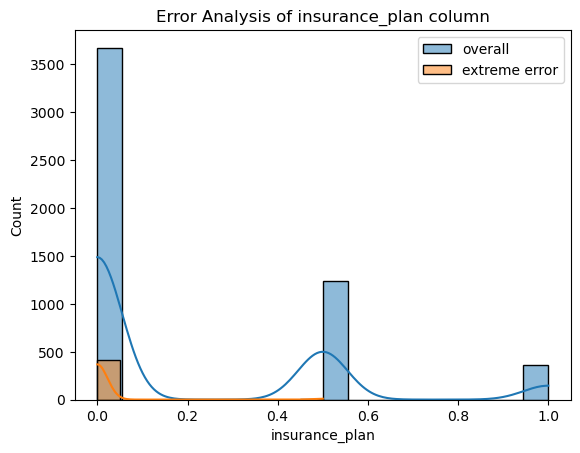

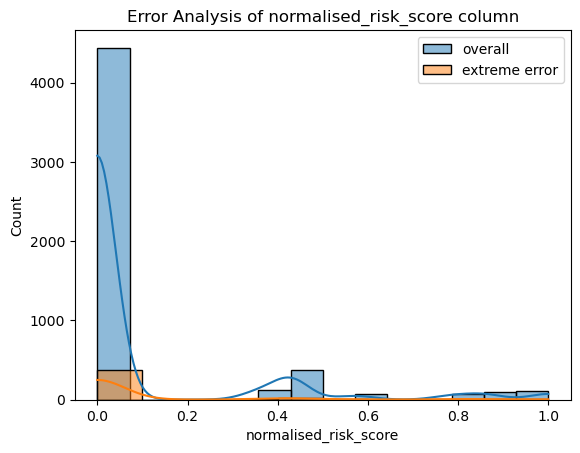

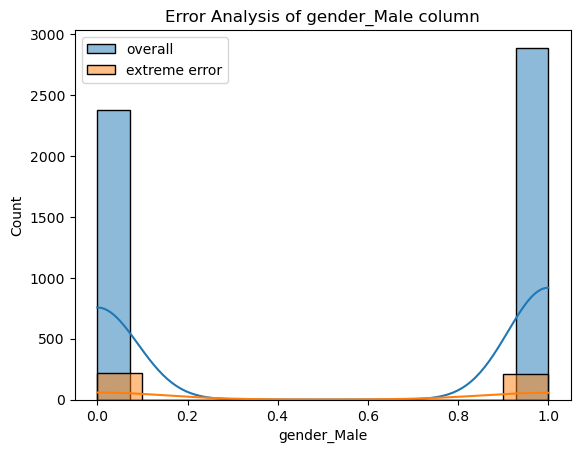

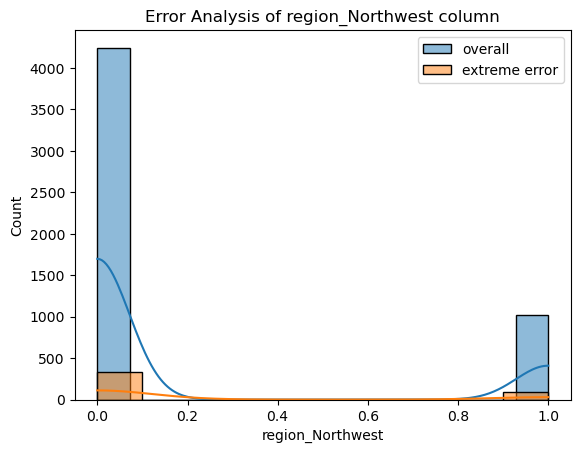

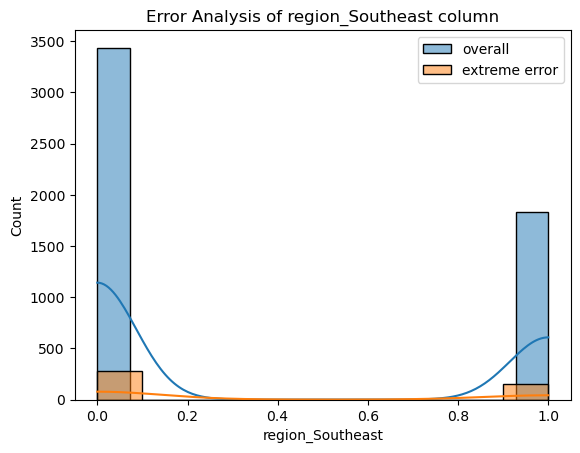

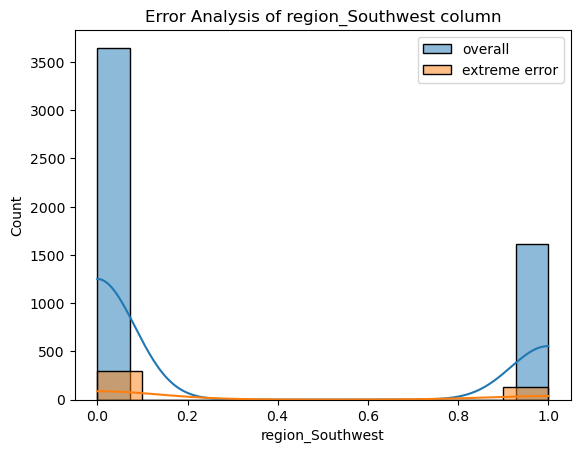

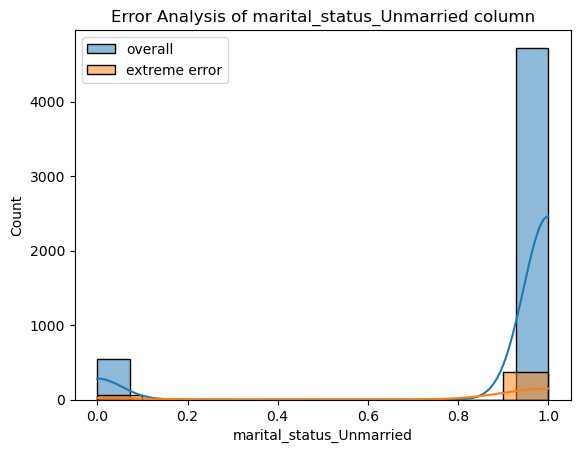

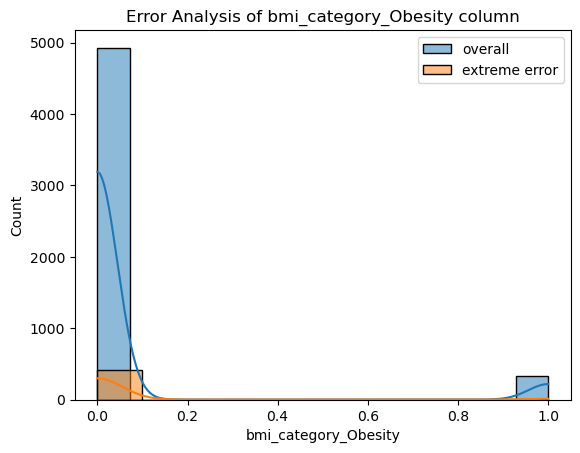

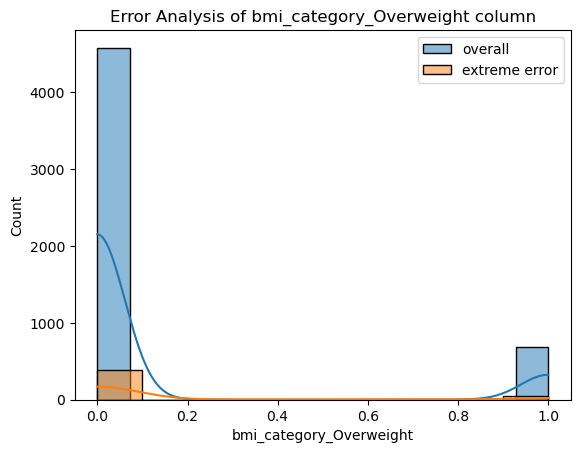

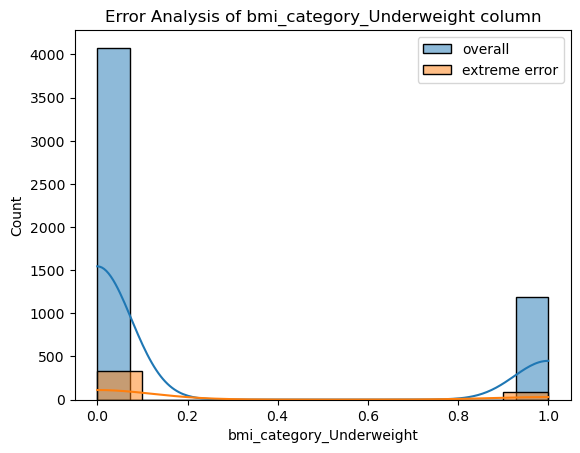

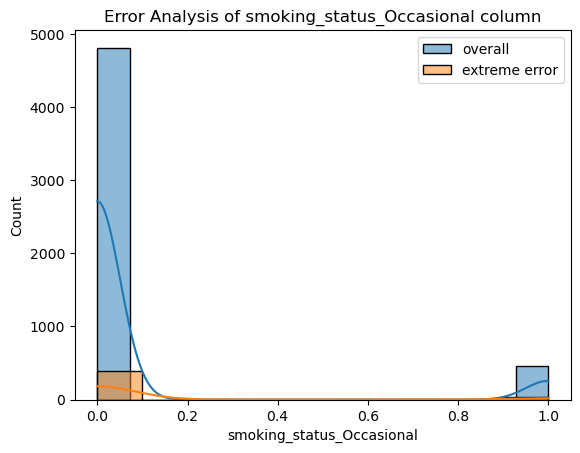

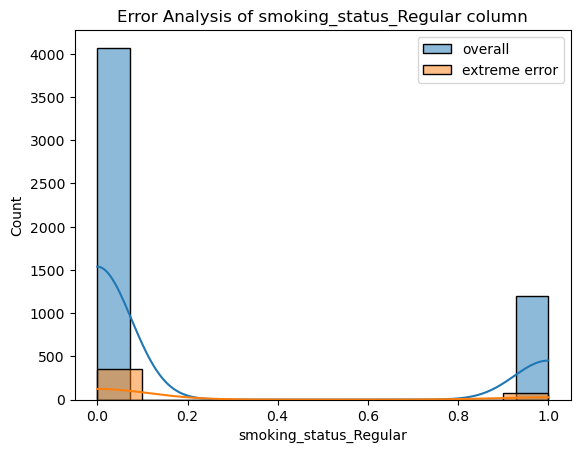

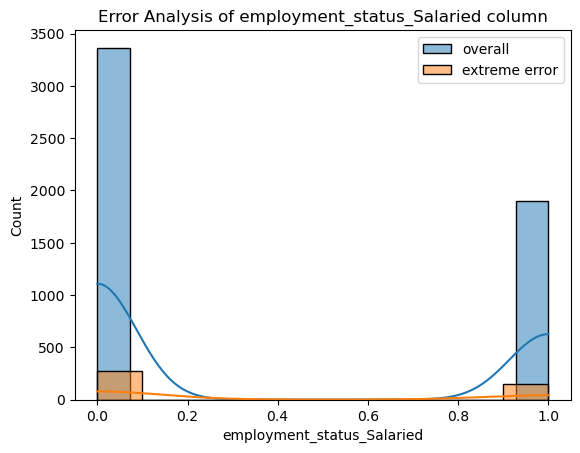

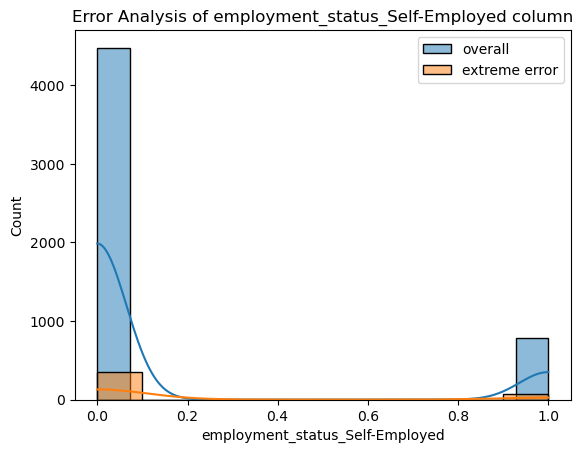

In [91]:
for i in X_test.columns:
    plt.title(f"Error Analysis of {i} column")

    sns.histplot(X_test[i],label='overall',kde=True)
    sns.histplot(extreme_error_df[i],label='extreme error',kde=True)
    plt.legend()
    plt.show()

#### so we can find there is a error is higher in Age column

<Axes: xlabel='age', ylabel='Count'>

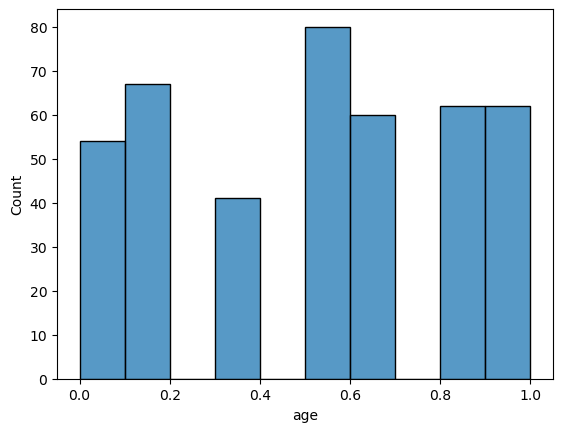

In [92]:
sns.histplot(extreme_error_df['age'])

In [93]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [94]:
extreme_error_df['income_level']=-1

In [95]:
extreme_error_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,income_level
14039,1.000000,0.000000,0.080808,0.0,0.000000,1,0,1,0,1,0,0,0,0,1,0,0,-1
8650,0.666667,0.000000,0.131313,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0,-1
9042,0.166667,1.000000,0.040404,0.0,0.428571,1,0,0,1,0,0,1,0,0,0,0,0,-1
8558,0.000000,0.000000,0.171717,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,0,1,-1
6718,1.000000,0.000000,0.090909,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,0.000000,0.000000,0.222222,0.0,0.000000,0,1,0,0,1,0,1,0,0,0,0,0,-1
3417,0.166667,0.000000,0.191919,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0,-1
14727,0.833333,0.666667,0.383838,0.0,0.000000,1,0,1,0,1,0,0,1,0,0,0,1,-1
5813,0.166667,0.000000,0.252525,0.0,0.000000,1,0,1,0,1,0,0,1,0,0,1,0,-1


In [96]:
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scalar.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,24.0,0.0,-2.0,9.0,1.0
1,22.0,0.0,-2.0,14.0,1.0
2,19.0,3.0,-2.0,5.0,1.0
3,18.0,0.0,-2.0,18.0,1.0
4,24.0,0.0,-2.0,10.0,1.0
...,...,...,...,...,...
421,18.0,0.0,-2.0,23.0,1.0
422,19.0,0.0,-2.0,20.0,1.0
423,23.0,2.0,-2.0,39.0,1.0
424,19.0,0.0,-2.0,26.0,1.0


In [97]:
df_reversed.age.quantile(0.97)

24.0

# model Export

C:\Users\ankit\Python Project\Helth insurance project
